In [1]:
from transformers import Wav2Vec2FeatureExtractor, WavLMForXVector
from datasets import load_dataset
import torch

# Cargamos el dataset CIEMPIESS
dataset = load_dataset("ciempiess/ciempiess_test")

In [2]:
# Cargamos el modelo preentrenado de Hugging Face y el extractor de caracteristicas
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained('microsoft/wavlm-base-sv')
model = WavLMForXVector.from_pretrained('microsoft/wavlm-base-sv')


In [3]:
print(dataset)

DatasetDict({
    test: Dataset({
        features: ['audio_id', 'audio', 'speaker_id', 'gender', 'duration', 'normalized_text'],
        num_rows: 3558
    })
})


In [3]:
# Accedemos al subconjunto 'test' del dataset
test_dataset = dataset['test']

In [ ]:
"""
reference_speaker_id = 'M_07'
reference_audio = test_dataset.filter(lambda x: x["speaker_id"] == reference_speaker_id)["audio"][0]["array"]

# Extraer las características del audio de referencia
reference_input = feature_extractor(reference_audio, return_tensors="pt")
reference_embedding = model(**reference_input).embeddings
reference_embedding = torch.nn.functional.normalize(reference_embedding, dim=-1).cpu()

# Función para comparar la voz del hablante con los otros hablantes
def compare_speakers(audio1, audio2, threshold=0.86 ):
    cosine_sim = torch.nn.CosineSimilarity(dim=-1)
    similarity = cosine_sim(audio1, audio2)
    return similarity >= threshold

# Comparar la voz del hablante M_07 con todos los demás hablantes
for sample in test_dataset:
    if sample["speaker_id"] != reference_speaker_id:
        other_audio = sample["audio"]["array"]
        other_input = feature_extractor(other_audio, return_tensors="pt")
        other_embedding = model(**other_input).embeddings
        other_embedding = torch.nn.functional.normalize(other_embedding, dim=-1).cpu()

        if compare_speakers(reference_embedding, other_embedding):
            print(f"La voz del hablante con ID {reference_speaker_id} es similar a la del hablante {sample['speaker_id']}.")
        else:
            print(f"La voz del hablante con ID {reference_speaker_id} NO coincide con la del hablante {sample['speaker_id']}.")
"""

In [19]:
import librosa

# Sample rate deseado (16000 Hz)
sampling_rate = 16000

# Cargamos y filtramos el audio de referencia con el sampling_rate
reference_speaker_id = 'M_07'
reference_audio = test_dataset.filter(lambda x: x["speaker_id"] == reference_speaker_id)["audio"][0]["array"]

# Extraer las características del audio de referencia
reference_input = feature_extractor(reference_audio, sampling_rate=sampling_rate, return_tensors="pt")
reference_embedding = model(**reference_input).embeddings
reference_embedding = torch.nn.functional.normalize(reference_embedding, dim=-1).cpu()

# Funcion para comparar la voz del hablante con los otros hablantes
def compare_speakers(audio1, audio2, threshold=0.86):
    cosine_sim = torch.nn.CosineSimilarity(dim=-1)
    similarity = cosine_sim(audio1, audio2)
    return similarity >= threshold

# Lista de los hablantes ya comparados
compared_speakers = []

# Comparamos la voz del hablante M_07 con todos los demas hablantes
for sample in test_dataset:
    if sample["speaker_id"] != reference_speaker_id and sample["speaker_id"] not in compared_speakers:
        other_audio = sample["audio"]["array"]
        
        # Extraemos las caracteristicas del otro hablante asegurando el sampling_rate
        other_input = feature_extractor(other_audio, sampling_rate=sampling_rate, return_tensors="pt")
        other_embedding = model(**other_input).embeddings
        other_embedding = torch.nn.functional.normalize(other_embedding, dim=-1).cpu()

        # Comparamos las voces
        if compare_speakers(reference_embedding, other_embedding):
            print(f"La voz del hablante con ID {reference_speaker_id} es similar a la del hablante {sample['speaker_id']}.")
        else:
            print(f"La voz del hablante con ID {reference_speaker_id} NO coincide con la del hablante {sample['speaker_id']}.")
        
        compared_speakers.append(sample["speaker_id"])

La voz del hablante con ID M_07 NO coincide con la del hablante F_01.
La voz del hablante con ID M_07 NO coincide con la del hablante F_05.
La voz del hablante con ID M_07 NO coincide con la del hablante F_07.
La voz del hablante con ID M_07 NO coincide con la del hablante F_04.
La voz del hablante con ID M_07 es similar a la del hablante M_01.
La voz del hablante con ID M_07 NO coincide con la del hablante F_08.
La voz del hablante con ID M_07 es similar a la del hablante M_10.
La voz del hablante con ID M_07 NO coincide con la del hablante M_09.
La voz del hablante con ID M_07 NO coincide con la del hablante M_03.
La voz del hablante con ID M_07 NO coincide con la del hablante M_04.
La voz del hablante con ID M_07 NO coincide con la del hablante F_03.
La voz del hablante con ID M_07 NO coincide con la del hablante F_10.
La voz del hablante con ID M_07 NO coincide con la del hablante F_06.
La voz del hablante con ID M_07 NO coincide con la del hablante F_09.
La voz del hablante con ID

In [4]:
import librosa

# Sample rate deseado (16000 Hz)
sampling_rate = 16000

# Funcion para comparar la voz del hablante con los otros hablantes
def compare_speakers(audio1, audio2, threshold=0.86):
    cosine_sim = torch.nn.CosineSimilarity(dim=-1)
    similarity = cosine_sim(audio1, audio2)
    return similarity >= threshold

# Inicializamos una lista para almacenar los embeddings de los hablantes M_01 a M_09
speakers_embeddings = {}
speakers_ids = [f"M_0{i}" for i in range(1, 9)]  # Lista de IDs M_01 a M_09

# Generamos los embeddings para los hablantes de referencia M_01 a M_09
for speaker_id in speakers_ids:
    speaker_audio = test_dataset.filter(lambda x: x["speaker_id"] == speaker_id)["audio"][0]["array"]
    
    # Extraer las características del audio
    speaker_input = feature_extractor(speaker_audio, sampling_rate=sampling_rate, return_tensors="pt")
    speaker_embedding = model(**speaker_input).embeddings
    speaker_embedding = torch.nn.functional.normalize(speaker_embedding, dim=-1).cpu()
    
    # Almacenar el embedding
    speakers_embeddings[speaker_id] = speaker_embedding

# Creamos una matriz de comparación vacía
comparison_matrix = {}

# Comparar cada hablante con los demás (M_01 con M_02, M_01 con M_03, etc.)
for speaker_ref in speakers_ids:
    comparison_matrix[speaker_ref] = {}
    for speaker_target in speakers_ids:
        if speaker_ref == speaker_target:
            comparison_matrix[speaker_ref][speaker_target] = True  # La comparación con uno mismo siempre es similar
        else:
            # Comparamos las voces de los hablantes
            is_similar = compare_speakers(speakers_embeddings[speaker_ref], speakers_embeddings[speaker_target])
            comparison_matrix[speaker_ref][speaker_target] = is_similar
            print(f"Comparación {speaker_ref} vs {speaker_target}: {'Similares' if is_similar else 'No similares'}.")

c:\Users\mrcom\anaconda3\Lib\site-packages\torch\nn\functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Comparación M_01 vs M_02: Similares.
Comparación M_01 vs M_03: Similares.
Comparación M_01 vs M_04: No similares.
Comparación M_01 vs M_05: Similares.
Comparación M_01 vs M_06: Similares.
Comparación M_01 vs M_07: Similares.
Comparación M_01 vs M_08: No similares.
Comparación M_02 vs M_01: Similares.
Comparación M_02 vs M_03: Similares.
Comparación M_02 vs M_04: Similares.
Comparación M_02 vs M_05: Similares.
Comparación M_02 vs M_06: Similares.
Comparación M_02 vs M_07: No similares.
Comparación M_02 vs M_08: No similares.
Comparación M_03 vs M_01: Similares.
Comparación M_03 vs M_02: Similares.
Comparación M_03 vs M_04: Similares.
Comparación M_03 vs M_05: Similares.
Comparación M_03 vs M_06: Similares.
Comparación M_03 vs M_07: No similares.
Comparación M_03 vs M_08: No similares.
Comparación M_04 vs M_01: No similares.
Comparación M_04 vs M_02: Similares.
Comparación M_04 vs M_03: Similares.
Comparación M_04 vs M_05: Similares.
Comparación M_04 vs M_06: Similares.
Comparación M_04 

c:\Users\mrcom\anaconda3\Lib\site-packages\torch\nn\functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Filter:   0%|          | 0/3558 [00:00<?, ? examples/s]

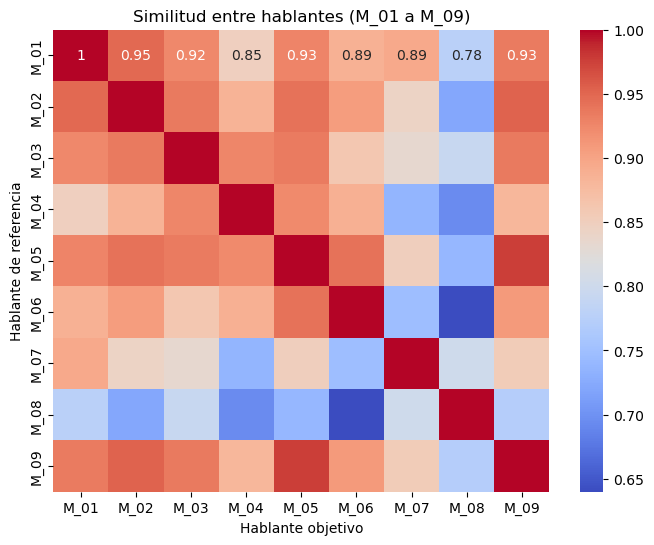

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample rate deseado (16000 Hz)
sampling_rate = 16000

# Funcion para calcular la similitud entre dos embeddings de audio
def get_similarity_score(audio1, audio2):
    cosine_sim = torch.nn.CosineSimilarity(dim=-1)
    similarity = cosine_sim(audio1, audio2)
    return similarity.item()  # Devolvemos el valor escalar de la similitud

# Inicializamos una lista para almacenar los embeddings de los hablantes M_01 a M_09
speakers_embeddings = {}
speakers_ids = [f"M_0{i}" for i in range(1, 10)]  # Lista de IDs M_01 a M_09

# Generamos los embeddings para los hablantes de referencia M_01 a M_09
for speaker_id in speakers_ids:
    speaker_audio = test_dataset.filter(lambda x: x["speaker_id"] == speaker_id)["audio"][0]["array"]
    
    # Extraer las características del audio
    speaker_input = feature_extractor(speaker_audio, sampling_rate=sampling_rate, return_tensors="pt")
    speaker_embedding = model(**speaker_input).embeddings
    speaker_embedding = torch.nn.functional.normalize(speaker_embedding, dim=-1).cpu()
    
    # Almacenar el embedding
    speakers_embeddings[speaker_id] = speaker_embedding

# Creamos una matriz vacía de similitudes
n_speakers = len(speakers_ids)
similarity_matrix = torch.zeros((n_speakers, n_speakers))

# Llenamos la matriz de similitud
for i, speaker_ref in enumerate(speakers_ids):
    for j, speaker_target in enumerate(speakers_ids):
        if speaker_ref == speaker_target:
            similarity_matrix[i, j] = 1.0  # La similitud consigo mismo es 1
        else:
            # Calculamos la similitud coseno entre las voces
            score = get_similarity_score(speakers_embeddings[speaker_ref], speakers_embeddings[speaker_target])
            similarity_matrix[i, j] = score

# Convertimos la matriz a formato NumPy para graficarla
similarity_matrix = similarity_matrix.numpy()

# Graficamos la matriz con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=speakers_ids, yticklabels=speakers_ids)
plt.title('Similitud entre hablantes (M_01 a M_09)')
plt.xlabel('Hablante objetivo')
plt.ylabel('Hablante de referencia')
plt.show()